<a href="https://colab.research.google.com/github/KanikaBhardwaj1/Reunion_1/blob/main/Part_1of_Reunion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Importing of some important liberaries

In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express  as px 
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import classification_report

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score

##Uploading the datasets

Applicant dataset

In [141]:
data1=pd.read_csv('/content/drive/MyDrive/Reunion/applicant.csv')

In [142]:
data1.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0


In [143]:
data1.shape

(1000, 15)

Loan dataset

In [144]:
data2=pd.read_csv('/content/drive/MyDrive/Reunion/loan.csv')

In [145]:
data2.head()

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


In [279]:
#To check the shape of dataset
data2.shape

(1000, 13)

We have to merge the two datasets.

In [147]:
df = data1.merge(data2)
print(df)


     applicant_id  Primary_applicant_age_in_years  Gender  \
0         1469590                              67    male   
1         1203873                              22  female   
2         1432761                              49    male   
3         1207582                              45    male   
4         1674436                              53    male   
..            ...                             ...     ...   
995       1880194                              31  female   
996       1114064                              40    male   
997       1758046                              38    male   
998       1824545                              23    male   
999       1660770                              27    male   

                 Marital_status  Number_of_dependents   Housing  \
0                        single                     1       own   
1    divorced/separated/married                     1       own   
2                        single                     2       own   

In [280]:
# head of merged dataset
df.head(5)

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,...,Balance_in_existing_bank_account_(upper_limit_of_bucket),Months_loan_taken_for,Purpose,Principal_loan_amount,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,4.204693,1,3,1,1,4,1,3,4,1,...,0,1.791759,5,13.971659,2,0,0,2,1,0
1,3.091042,0,1,1,1,2,1,1,2,1,...,1,3.871201,5,15.599070,2,0,0,1,3,1
2,3.891820,1,3,2,1,3,3,2,3,1,...,0,2.484907,4,14.555541,2,0,0,1,1,0
3,3.806662,1,3,2,0,4,1,2,3,1,...,0,3.737670,0,15.880092,0,0,1,1,3,0
4,3.970292,1,3,2,0,4,1,1,2,1,...,0,3.178054,6,15.398604,0,0,0,2,2,1


In [149]:
df.shape

(1000, 27)

Finally, we have 1000 rows and 27 features including target variable.

In [150]:
#All the columns in dataset
df.columns

Index(['applicant_id', 'Primary_applicant_age_in_years', 'Gender',
       'Marital_status', 'Number_of_dependents', 'Housing',
       'Years_at_current_residence', 'Employment_status',
       'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most',
       'Telephone', 'Foreign_worker', 'Savings_account_balance',
       'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
       'Balance_in_existing_bank_account_(upper_limit_of_bucket)',
       'loan_application_id', 'Months_loan_taken_for', 'Purpose',
       'Principal_loan_amount', 'EMI_rate_in_percentage_of_disposable_income',
       'Property', 'Has_coapplicant', 'Has_guarantor', 'Other_EMI_plans',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant'],
      dtype='object')

In [151]:
# To check the data types of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

In [152]:
df.describe()

,applicant_id,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.514763e+06,35.546000,1.155000,2.845000,0.963000,20.903000,3.271258e+06,2.973000,0.041000,0.052000,1.407000,0.300000
std,2.286764e+05,11.375469,0.362086,1.103718,0.188856,12.058814,2.822737e+06,1.118715,0.198389,0.222138,0.577654,0.458487
min,1.105364e+06,19.000000,1.000000,1.000000,0.000000,4.000000,2.500000e+05,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.321398e+06,27.000000,1.000000,2.000000,1.000000,12.000000,1.365500e+06,2.000000,0.000000,0.000000,1.000000,0.000000
50%,1.529114e+06,33.000000,1.000000,3.000000,1.000000,18.000000,2.319500e+06,3.000000,0.000000,0.000000,1.000000,0.000000
75%,1.707752e+06,42.000000,1.000000,4.000000,1.000000,24.000000,3.972250e+06,4.000000,0.000000,0.000000,2.000000,1.000000
max,1.903505e+06,75.000000,2.000000,4.000000,1.000000,72.000000,1.842400e+07,4.000000,1.000000,1.000000,4.000000,1.000000


[Text(0, 0.5, 'mean'),
 Text(0, 1.5, 'std'),
 Text(0, 2.5, 'min'),
 Text(0, 3.5, '25%'),
 Text(0, 4.5, '50%'),
 Text(0, 5.5, '75%'),
 Text(0, 6.5, 'max')]

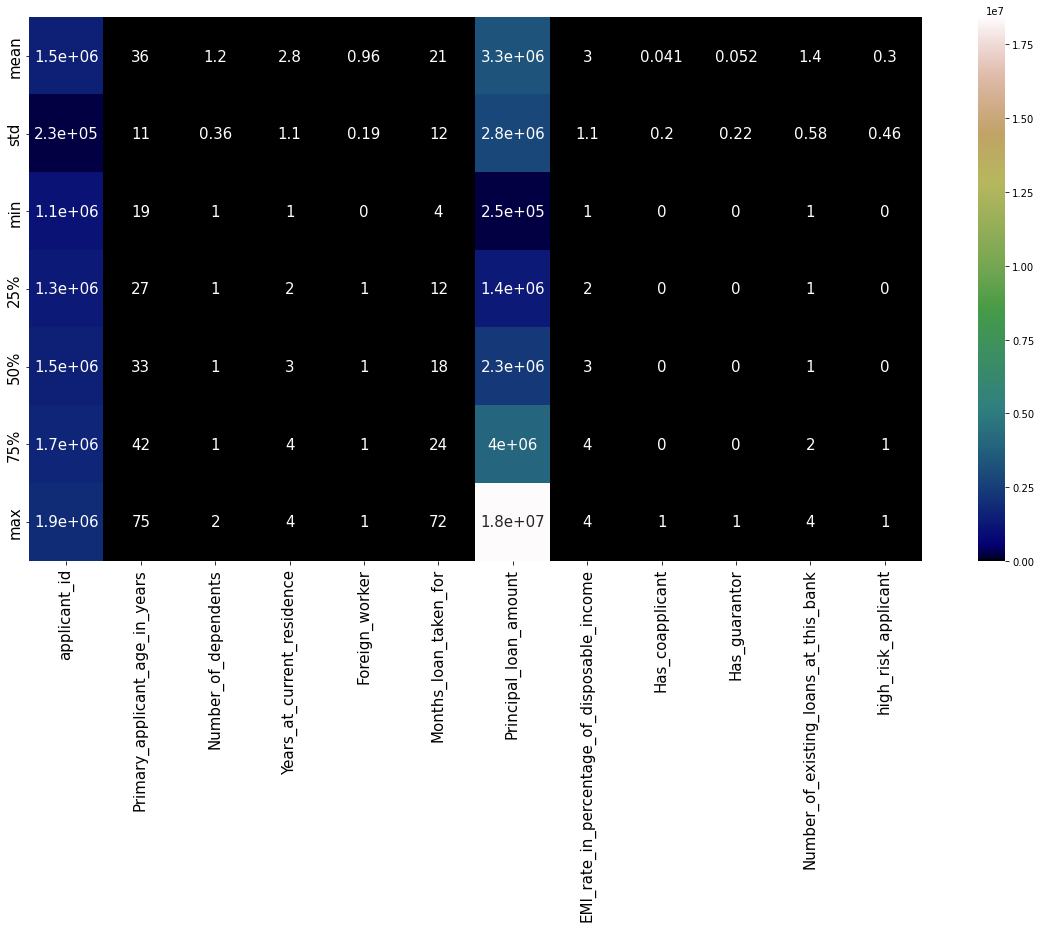

In [153]:
#Descriptive Stats in visual form

plt.figure(figsize=(20,10))
svm = sns.heatmap(df.describe()[1:], annot=True, cmap='gist_earth',annot_kws={"size": 15})
svm.set_xticklabels(svm.get_xmajorticklabels(), fontsize = 15)
svm.set_yticklabels(svm.get_ymajorticklabels(), fontsize = 15)

##**Preprocessing Data**

To check the null values in our dataset.

In [154]:
df.isnull().sum()

applicant_id                                                  0
Primary_applicant_age_in_years                                0
Gender                                                        0
Marital_status                                                0
Number_of_dependents                                          0
Housing                                                       0
Years_at_current_residence                                    0
Employment_status                                             0
Has_been_employed_for_at_least                               62
Has_been_employed_for_at_most                               253
Telephone                                                   596
Foreign_worker                                                0
Savings_account_balance                                     183
Balance_in_existing_bank_account_(lower_limit_of_bucket)    668
Balance_in_existing_bank_account_(upper_limit_of_bucket)    457
loan_application_id                     

So we have large missing values in our data set.

In [155]:
# Let us check for unique values in columns.
print(df.nunique().sort_values())

Telephone                                                      1
Balance_in_existing_bank_account_(lower_limit_of_bucket)       2
Other_EMI_plans                                                2
Has_guarantor                                                  2
Has_coapplicant                                                2
Balance_in_existing_bank_account_(upper_limit_of_bucket)       2
Foreign_worker                                                 2
high_risk_applicant                                            2
Number_of_dependents                                           2
Gender                                                         2
Housing                                                        3
Property                                                       3
Has_been_employed_for_at_least                                 4
Has_been_employed_for_at_most                                  4
Years_at_current_residence                                     4
Savings_account_balance  

In [156]:
# find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 15 categorical variables


In [157]:
categorical

['Gender',
 'Marital_status',
 'Housing',
 'Employment_status',
 'Has_been_employed_for_at_least',
 'Has_been_employed_for_at_most',
 'Telephone',
 'Savings_account_balance',
 'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
 'Balance_in_existing_bank_account_(upper_limit_of_bucket)',
 'loan_application_id',
 'Purpose',
 'Property',
 'Other_EMI_plans',
 'Loan_history']

In [158]:
# find Numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 12 numerical variables


In [159]:
numerical

['applicant_id',
 'Primary_applicant_age_in_years',
 'Number_of_dependents',
 'Years_at_current_residence',
 'Foreign_worker',
 'Months_loan_taken_for',
 'Principal_loan_amount',
 'EMI_rate_in_percentage_of_disposable_income',
 'Has_coapplicant',
 'Has_guarantor',
 'Number_of_existing_loans_at_this_bank',
 'high_risk_applicant']

In [160]:
discrete = []
for var in numerical:
    if len(df[var].unique())<20:
        print(var, ' values: ', df[var].unique())
        discrete.append(var)
        
print('There are {} discrete variables'.format(len(discrete)))

Number_of_dependents  values:  [1 2]
Years_at_current_residence  values:  [4 2 3 1]
Foreign_worker  values:  [1 0]
EMI_rate_in_percentage_of_disposable_income  values:  [4 2 3 1]
Has_coapplicant  values:  [0 1]
Has_guarantor  values:  [0 1]
Number_of_existing_loans_at_this_bank  values:  [2 1 3 4]
high_risk_applicant  values:  [0 1]
There are 8 discrete variables


In [161]:
discrete

['Number_of_dependents',
 'Years_at_current_residence',
 'Foreign_worker',
 'EMI_rate_in_percentage_of_disposable_income',
 'Has_coapplicant',
 'Has_guarantor',
 'Number_of_existing_loans_at_this_bank',
 'high_risk_applicant']

In [162]:
continuous = [var for var in numerical if var not in discrete and var not in ['applicant_id', 'loan_application_id']]

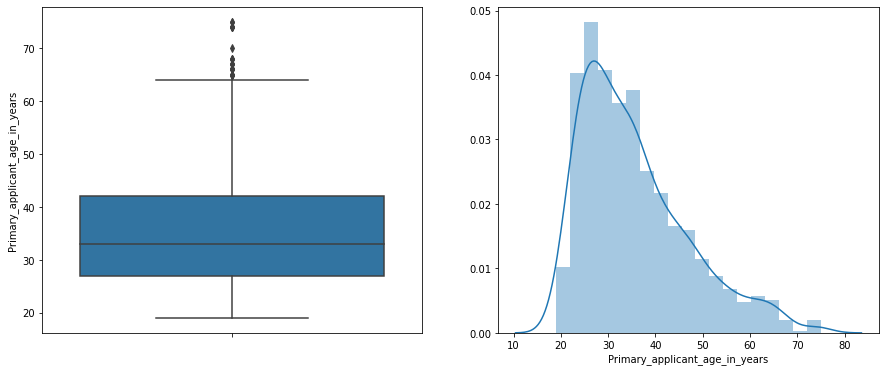

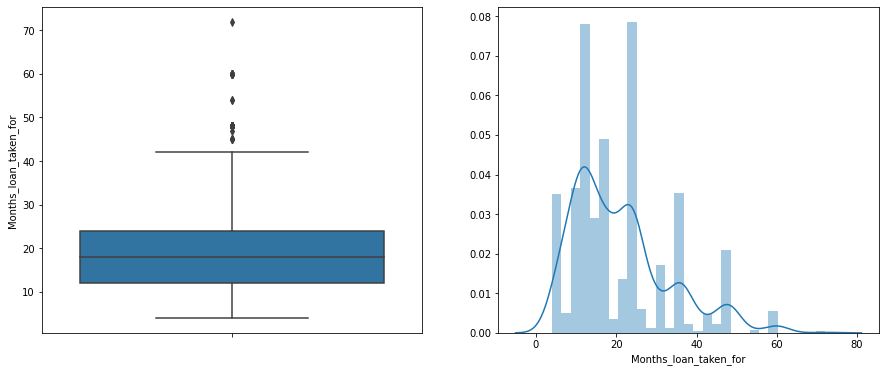

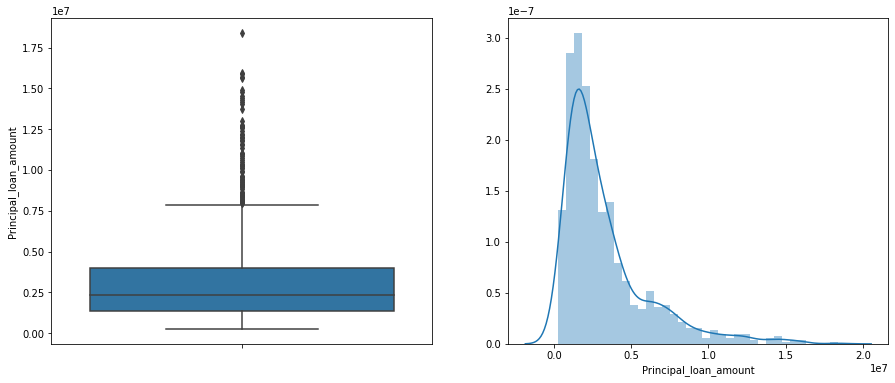

In [163]:
for var in continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var].dropna())
    fig.set_ylabel('')
    fig.set_xlabel(var)

**Handling the missing values by various methods.**

In [164]:
df['Has_been_employed_for_at_least'] =  df['Has_been_employed_for_at_least'].fillna('0 year')

In [165]:
df['Has_been_employed_for_at_most'] =  df['Has_been_employed_for_at_most'].fillna('7+ years')

In [166]:
# define conditions and values
conditions = [df['Housing'] == 'own',df['Housing']=='rent',df['Housing']=='for free']
values = ['real estate','car or other','building society savings agreement/life insurance']

In [167]:
df['Property'] = np.where(df['Property'].isnull(),np.select(conditions, values),df['Property'])

In [168]:
df['Balance_in_existing_bank_account_(lower_limit_of_bucket)'] = df['Balance_in_existing_bank_account_(lower_limit_of_bucket)'].fillna('0')

In [169]:
# apply logic where company_type is null


df.dropna(subset=['Purpose'], inplace=True)
df.drop(['Telephone'],axis = 1 ,inplace = True)
df.drop(['Other_EMI_plans'],axis = 1 ,inplace = True)
df['Savings_account_balance'] = df['Savings_account_balance'].fillna('Low')
df.drop(['EMI_rate_in_percentage_of_disposable_income'],axis=1,inplace=True)
df['Balance_in_existing_bank_account_(upper_limit_of_bucket)'] = df['Balance_in_existing_bank_account_(upper_limit_of_bucket)'].fillna('0')

In [170]:
df.drop(['applicant_id'],axis = 1 ,inplace = True)

In [171]:
df.isnull().sum()

Primary_applicant_age_in_years                              0
Gender                                                      0
Marital_status                                              0
Number_of_dependents                                        0
Housing                                                     0
Years_at_current_residence                                  0
Employment_status                                           0
Has_been_employed_for_at_least                              0
Has_been_employed_for_at_most                               0
Foreign_worker                                              0
Savings_account_balance                                     0
Balance_in_existing_bank_account_(lower_limit_of_bucket)    0
Balance_in_existing_bank_account_(upper_limit_of_bucket)    0
loan_application_id                                         0
Months_loan_taken_for                                       0
Purpose                                                     0
Principa

Hurrah, we have filled all he missing values.

In [172]:
df.head()

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,...,loan_application_id,Months_loan_taken_for,Purpose,Principal_loan_amount,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,67,male,single,1,own,4,skilled employee / official,7 years,7+ years,1,...,d68d975e-edad-11ea-8761-1d6f9c1ff461,6,electronic equipment,1169000,real estate,0,0,2,critical/pending loans at other banks,0
1,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,1,...,d68d989e-edad-11ea-b1d5-2bcf65006448,48,electronic equipment,5951000,real estate,0,0,1,existing loans paid back duly till now,1
2,49,male,single,2,own,3,unskilled - resident,4 years,7 years,1,...,d68d995c-edad-11ea-814a-1b6716782575,12,education,2096000,real estate,0,0,1,critical/pending loans at other banks,0
3,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,1,...,d68d99fc-edad-11ea-8841-17e8848060ae,42,FF&E,7882000,building society savings agreement/life insurance,0,1,1,existing loans paid back duly till now,0
4,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,1,...,d68d9a92-edad-11ea-9f3d-1f8682db006a,24,new vehicle,4870000,building society savings agreement/life insurance,0,0,2,delay in paying off loans in the past,1


In [173]:
df.shape

(988, 23)

##Exploratory Data Analysis

In [174]:
categorical

['Gender',
 'Marital_status',
 'Housing',
 'Employment_status',
 'Has_been_employed_for_at_least',
 'Has_been_employed_for_at_most',
 'Telephone',
 'Savings_account_balance',
 'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
 'Balance_in_existing_bank_account_(upper_limit_of_bucket)',
 'loan_application_id',
 'Purpose',
 'Property',
 'Other_EMI_plans',
 'Loan_history']

In [175]:
df['Gender'].value_counts()

male      681
female    307
Name: Gender, dtype: int64

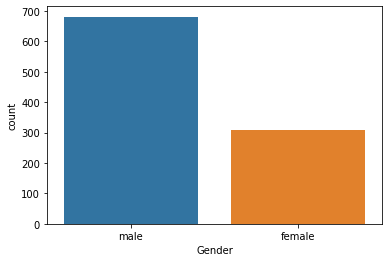

In [176]:
# To count bankrupt
sns.countplot('Gender',data=df)

In [177]:
df['Marital_status'].value_counts()

single                        540
divorced/separated/married    307
married/widowed                92
divorced/separated             49
Name: Marital_status, dtype: int64

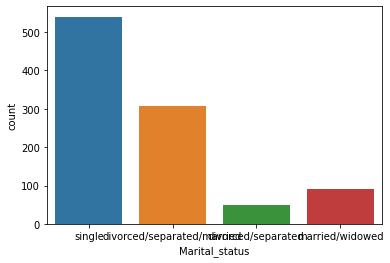

In [178]:
# To count bankrupt
sns.countplot('Marital_status',data=df)

In [179]:
df['Number_of_dependents'].value_counts()

1    835
2    153
Name: Number_of_dependents, dtype: int64

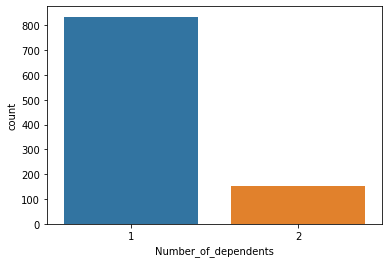

In [180]:
sns.countplot('Number_of_dependents',data=df)

In [181]:
df['Employment_status'].value_counts()

skilled employee / official                                         629
unskilled - resident                                                199
management / self-employed / highly qualified employee / officer    139
unemployed / unskilled - non-resident                                21
Name: Employment_status, dtype: int64

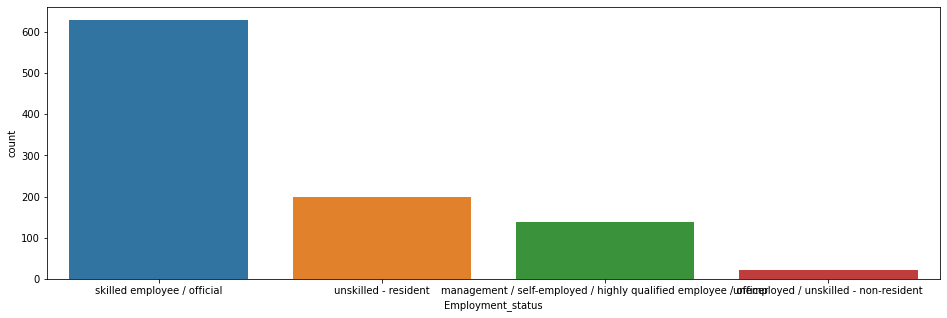

In [182]:
plt.figure(figsize=(16,5))
sns.countplot('Employment_status',data=df)

In [183]:
df['Foreign_worker'].value_counts()

1    952
0     36
Name: Foreign_worker, dtype: int64

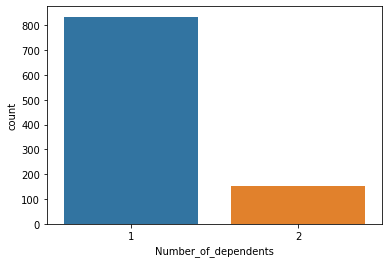

In [184]:
sns.countplot('Number_of_dependents',data=df)

In [185]:
df['Housing'].value_counts()

own         705
rent        179
for free    104
Name: Housing, dtype: int64

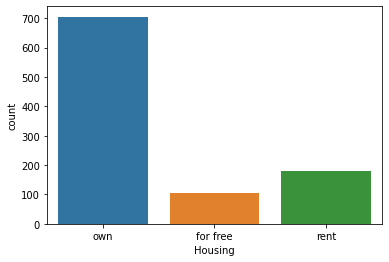

In [186]:
sns.countplot('Housing',data=df)

In [187]:
df['Savings_account_balance'].value_counts()

Low          776
Medium       101
High          63
Very high     48
Name: Savings_account_balance, dtype: int64

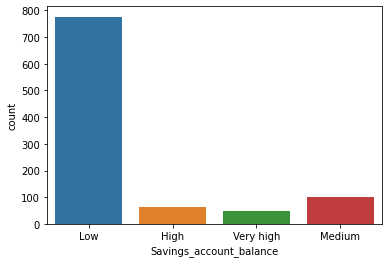

In [188]:
sns.countplot('Savings_account_balance',data=df)

In [189]:
df['Purpose'].value_counts()

electronic equipment    280
new vehicle             234
FF&E                    181
used vehicle            103
business                 97
education                50
repair costs             22
domestic appliances      12
career development        9
Name: Purpose, dtype: int64

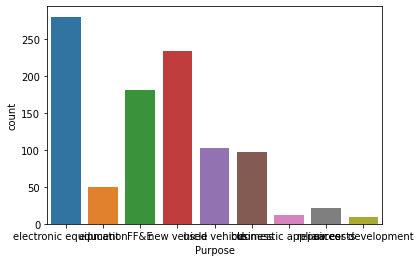

In [190]:
sns.countplot('Purpose',data=df)

In [191]:
df['Has_coapplicant'].value_counts()

0    951
1     37
Name: Has_coapplicant, dtype: int64

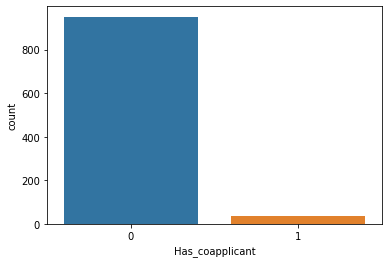

In [192]:
sns.countplot('Has_coapplicant',data=df)

In [193]:
df['Has_guarantor'].value_counts()

0    937
1     51
Name: Has_guarantor, dtype: int64

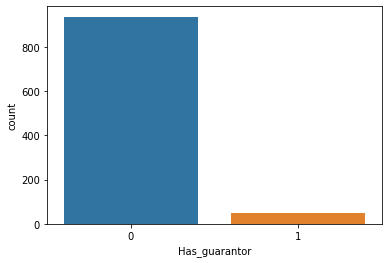

In [194]:
sns.countplot('Has_guarantor',data=df)

In [195]:
df['Number_of_existing_loans_at_this_bank'].value_counts()

1    627
2    327
3     28
4      6
Name: Number_of_existing_loans_at_this_bank, dtype: int64

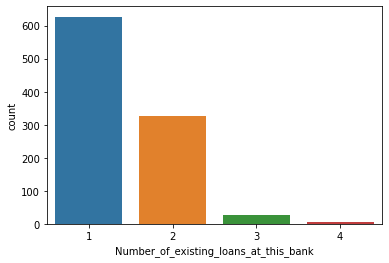

In [196]:
sns.countplot('Number_of_existing_loans_at_this_bank',data=df)

In [197]:
df['Loan_history'].value_counts()

existing loans paid back duly till now     526
critical/pending loans at other banks      290
delay in paying off loans in the past       86
all loans at this bank paid back duly       47
no loans taken/all loans paid back duly     39
Name: Loan_history, dtype: int64

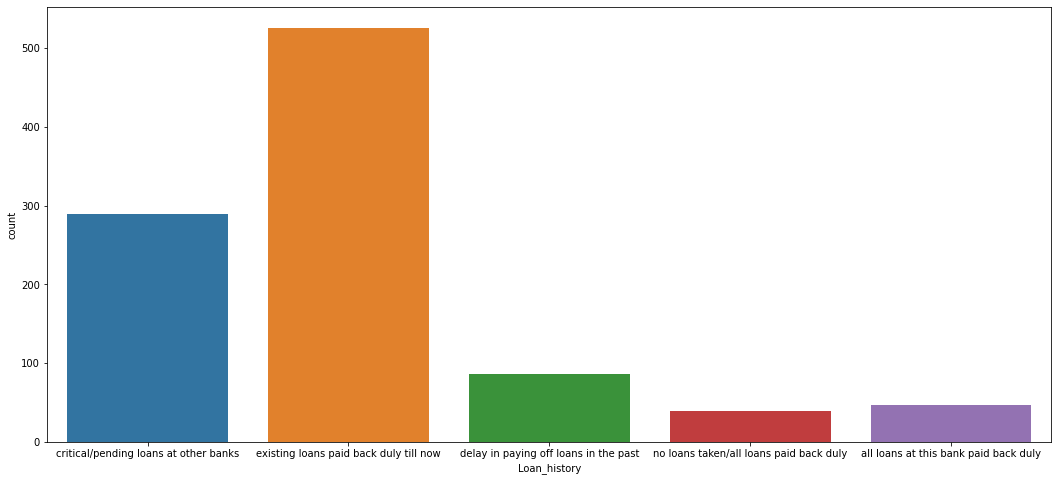

In [198]:
plt.figure(figsize=(18,8))
sns.countplot('Loan_history',data=df)

In [199]:
df['high_risk_applicant'].value_counts()

0    693
1    295
Name: high_risk_applicant, dtype: int64

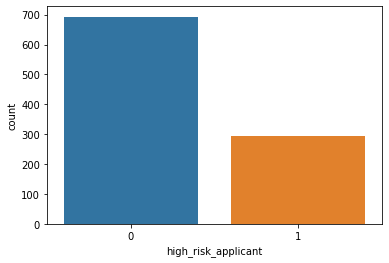

In [200]:
sns.countplot('high_risk_applicant',data=df)

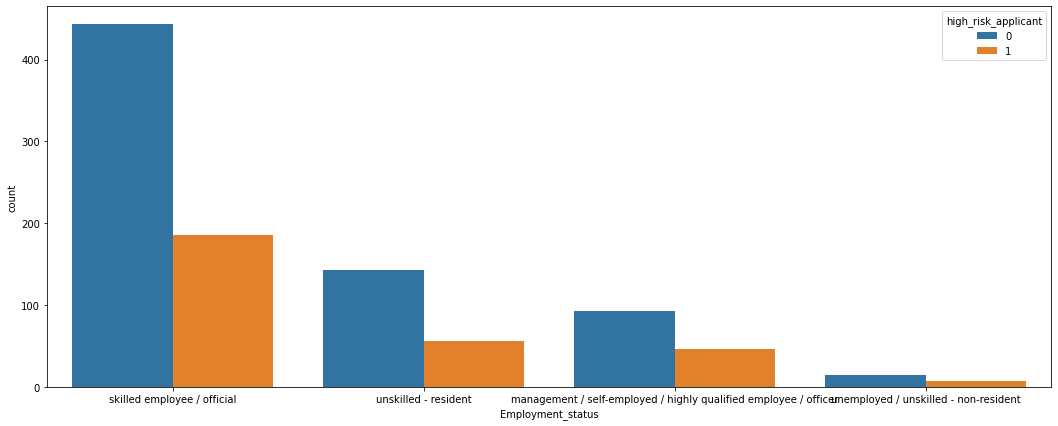

In [201]:
plt.figure(figsize=(18,7))
sns.countplot(x="Employment_status", hue="high_risk_applicant", data=df)

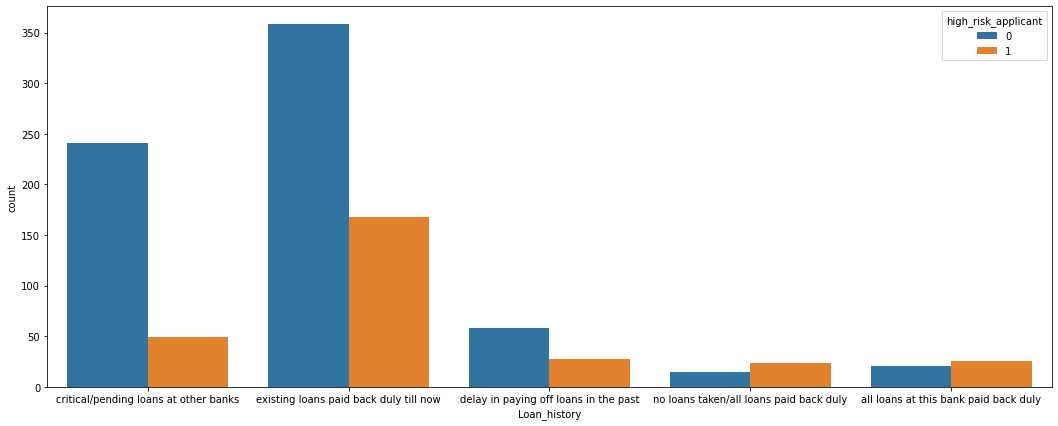

In [202]:
plt.figure(figsize=(18,7))
sns.countplot(x="Loan_history", hue="high_risk_applicant", data=df)

In [203]:
# correlation 
df.corr()

,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker,Months_loan_taken_for,Principal_loan_amount,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant
Primary_applicant_age_in_years,1.000000,0.117069,0.262379,0.003681,-0.043099,0.028092,-0.016528,-0.032255,0.150848,-0.093679
Number_of_dependents,0.117069,1.000000,0.041654,-0.081004,-0.017073,0.020776,-0.040225,0.039227,0.105987,-0.004177
Years_at_current_residence,0.262379,0.041654,1.000000,0.050023,0.028927,0.028519,0.004420,-0.032442,0.090419,0.004351
Foreign_worker,0.003681,-0.081004,0.050023,1.000000,0.152118,0.079046,-0.075447,-0.101114,0.005712,0.091465
Months_loan_taken_for,-0.043099,-0.017073,0.028927,0.152118,1.000000,0.623414,0.023076,-0.039037,-0.008414,0.213325
Principal_loan_amount,0.028092,0.020776,0.028519,0.079046,0.623414,1.000000,0.027754,-0.061272,0.018994,0.143898
Has_coapplicant,-0.016528,-0.040225,0.004420,-0.075447,0.023076,0.027754,1.000000,-0.046018,-0.018600,0.057691
Has_guarantor,-0.032255,0.039227,-0.032442,-0.101114,-0.039037,-0.061272,-0.046018,1.000000,-0.021359,-0.052256
Number_of_existing_loans_at_this_bank,0.150848,0.105987,0.090419,0.005712,-0.008414,0.018994,-0.018600,-0.021359,1.000000,-0.048705
high_risk_applicant,-0.093679,-0.004177,0.004351,0.091465,0.213325,0.143898,0.057691,-0.052256,-0.048705,1.000000


Relation with numerical features

In [204]:
continuous = [var for var in numerical if var not in discrete and var not in ['applicant_id', 'loan_application_id']]

In [205]:
continuous

['Primary_applicant_age_in_years',
 'Months_loan_taken_for',
 'Principal_loan_amount']

**Working on continous variables.**

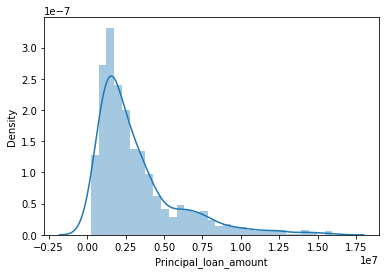

In [206]:
sns.distplot(df["Principal_loan_amount"])

In [207]:
df["Principal_loan_amount"] = np.log(df["Principal_loan_amount"])

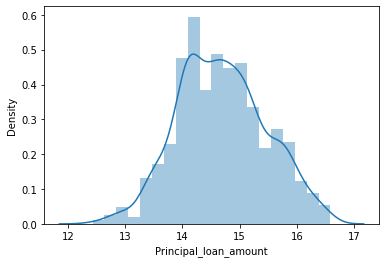

In [208]:
sns.distplot(df["Principal_loan_amount"])

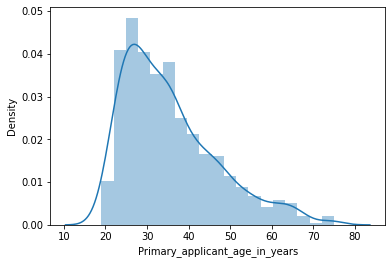

In [209]:
sns.distplot(df["Primary_applicant_age_in_years"])

In [210]:
df["Primary_applicant_age_in_years"] = np.log(df["Primary_applicant_age_in_years"])


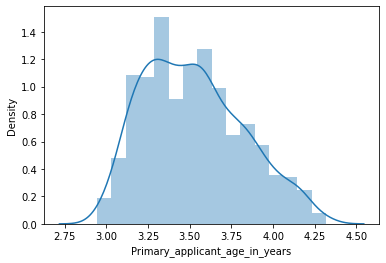

In [211]:
sns.distplot(df["Primary_applicant_age_in_years"])

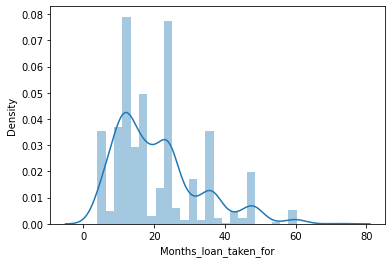

In [212]:
sns.distplot(df["Months_loan_taken_for"])

In [213]:
df["Months_loan_taken_for"] = np.log(df["Months_loan_taken_for"])

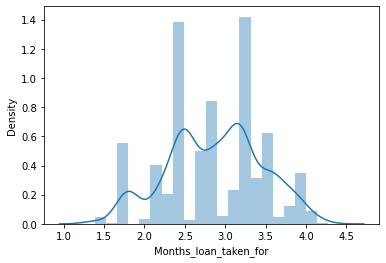

In [214]:
sns.distplot(df["Months_loan_taken_for"])

I have applied log transformation for normal data distribution.

**Multicorrelation**

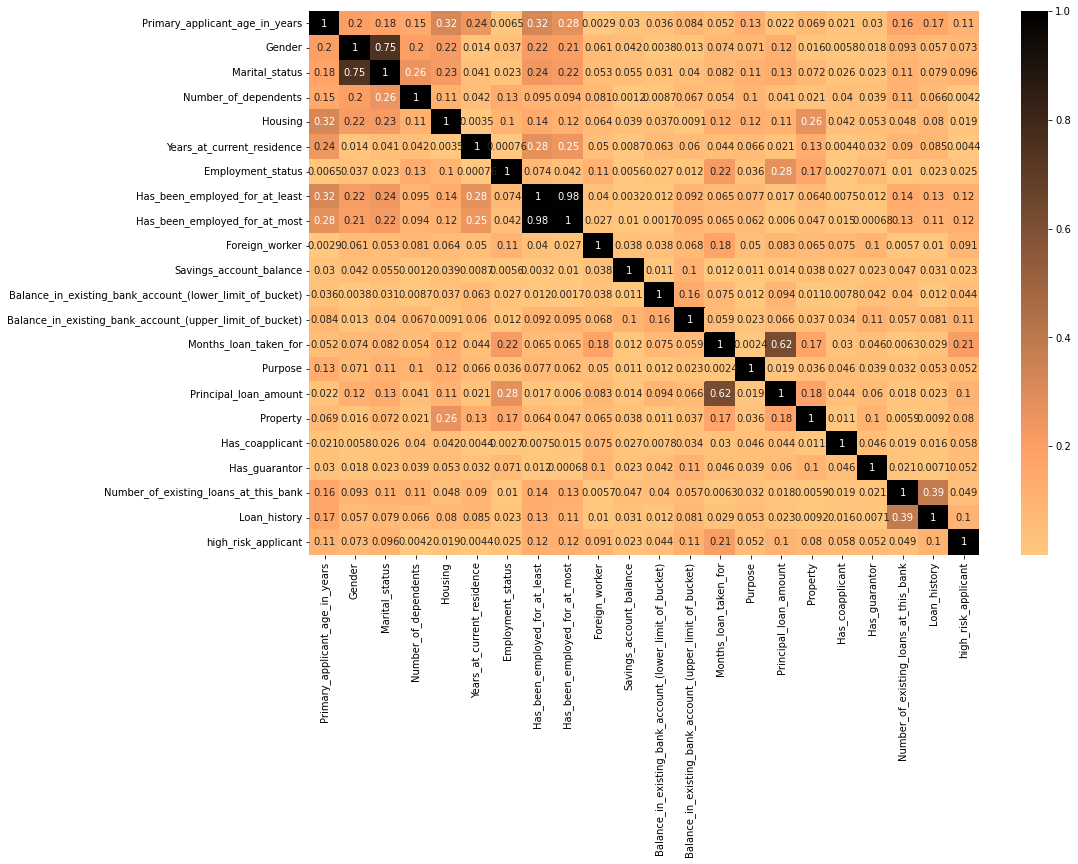

In [277]:
plt.figure(figsize=(15,10))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='copper_r')

In [216]:
numeric_feature=df.describe().columns
numeric_feature

Index(['Primary_applicant_age_in_years', 'Number_of_dependents',
       'Years_at_current_residence', 'Foreign_worker', 'Months_loan_taken_for',
       'Principal_loan_amount', 'Has_coapplicant', 'Has_guarantor',
       'Number_of_existing_loans_at_this_bank', 'high_risk_applicant'],
      dtype='object')

In [217]:
# find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 13 categorical variables


In [218]:
categorical

['Gender',
 'Marital_status',
 'Housing',
 'Employment_status',
 'Has_been_employed_for_at_least',
 'Has_been_employed_for_at_most',
 'Savings_account_balance',
 'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
 'Balance_in_existing_bank_account_(upper_limit_of_bucket)',
 'loan_application_id',
 'Purpose',
 'Property',
 'Loan_history']

In [219]:
# find Numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 10 numerical variables


In [220]:
numerical

['Primary_applicant_age_in_years',
 'Number_of_dependents',
 'Years_at_current_residence',
 'Foreign_worker',
 'Months_loan_taken_for',
 'Principal_loan_amount',
 'Has_coapplicant',
 'Has_guarantor',
 'Number_of_existing_loans_at_this_bank',
 'high_risk_applicant']

In [221]:
discrete = []
for var in numerical:
    if len(df[var].unique())<20:
        print(var, ' values: ', df[var].unique())
        discrete.append(var)
        
print('There are {} discrete variables'.format(len(discrete)))

Number_of_dependents  values:  [1 2]
Years_at_current_residence  values:  [4 2 3 1]
Foreign_worker  values:  [1 0]
Has_coapplicant  values:  [0 1]
Has_guarantor  values:  [0 1]
Number_of_existing_loans_at_this_bank  values:  [2 1 3 4]
high_risk_applicant  values:  [0 1]
There are 7 discrete variables


In [222]:
discrete

['Number_of_dependents',
 'Years_at_current_residence',
 'Foreign_worker',
 'Has_coapplicant',
 'Has_guarantor',
 'Number_of_existing_loans_at_this_bank',
 'high_risk_applicant']

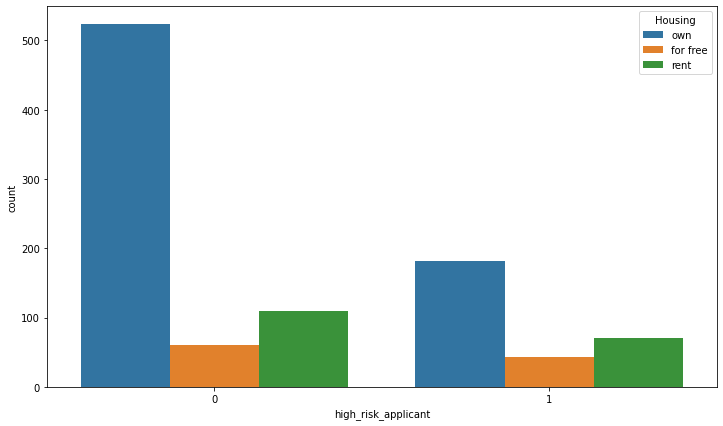

In [223]:
plt.figure (figsize=(12,7))
sns.countplot(x='high_risk_applicant',hue='Housing', data=df)

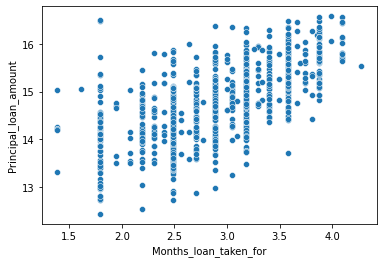

In [224]:
sns.scatterplot(x='Months_loan_taken_for', y='Principal_loan_amount', data=df)

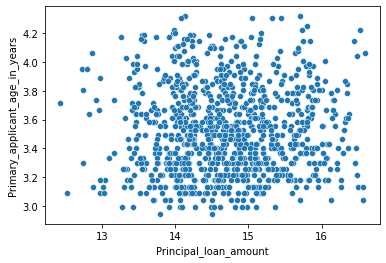

In [225]:
sns.scatterplot(x='Principal_loan_amount', y='Primary_applicant_age_in_years', data=df)

##Dropping unnecessary features

In [226]:
df.drop(['loan_application_id'],axis = 1 ,inplace = True)

As loan application id is not important for me hence I drooped this feature.

##Label Encoding

In [227]:
from sklearn.preprocessing import LabelEncoder

In [228]:
# Encode Categorical Columns
le = LabelEncoder()

In [229]:
df[['Gender', 'Marital_status', 'Housing','Employment_status','Has_been_employed_for_at_least','Has_been_employed_for_at_most','Savings_account_balance','Balance_in_existing_bank_account_(lower_limit_of_bucket)','Balance_in_existing_bank_account_(upper_limit_of_bucket)','Purpose','Property','Loan_history']] = df[['Gender', 'Marital_status', 'Housing','Employment_status','Has_been_employed_for_at_least','Has_been_employed_for_at_most','Savings_account_balance','Balance_in_existing_bank_account_(lower_limit_of_bucket)','Balance_in_existing_bank_account_(upper_limit_of_bucket)','Purpose','Property','Loan_history']].apply(LabelEncoder().fit_transform)

In [230]:
df.head()

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,...,Balance_in_existing_bank_account_(upper_limit_of_bucket),Months_loan_taken_for,Purpose,Principal_loan_amount,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,4.204693,1,3,1,1,4,1,3,4,1,...,0,1.791759,5,13.971659,2,0,0,2,1,0
1,3.091042,0,1,1,1,2,1,1,2,1,...,1,3.871201,5,15.599070,2,0,0,1,3,1
2,3.891820,1,3,2,1,3,3,2,3,1,...,0,2.484907,4,14.555541,2,0,0,1,1,0
3,3.806662,1,3,2,0,4,1,2,3,1,...,0,3.737670,0,15.880092,0,0,1,1,3,0
4,3.970292,1,3,2,0,4,1,1,2,1,...,0,3.178054,6,15.398604,0,0,0,2,2,1


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 988 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Primary_applicant_age_in_years                            988 non-null    float64
 1   Gender                                                    988 non-null    int64  
 2   Marital_status                                            988 non-null    int64  
 3   Number_of_dependents                                      988 non-null    int64  
 4   Housing                                                   988 non-null    int64  
 5   Years_at_current_residence                                988 non-null    int64  
 6   Employment_status                                         988 non-null    int64  
 7   Has_been_employed_for_at_least                            988 non-null    int64  
 8   Has_been_employed_fo

In [232]:
df.head()

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,...,Balance_in_existing_bank_account_(upper_limit_of_bucket),Months_loan_taken_for,Purpose,Principal_loan_amount,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,4.204693,1,3,1,1,4,1,3,4,1,...,0,1.791759,5,13.971659,2,0,0,2,1,0
1,3.091042,0,1,1,1,2,1,1,2,1,...,1,3.871201,5,15.599070,2,0,0,1,3,1
2,3.891820,1,3,2,1,3,3,2,3,1,...,0,2.484907,4,14.555541,2,0,0,1,1,0
3,3.806662,1,3,2,0,4,1,2,3,1,...,0,3.737670,0,15.880092,0,0,1,1,3,0
4,3.970292,1,3,2,0,4,1,1,2,1,...,0,3.178054,6,15.398604,0,0,0,2,2,1


In [233]:
#separating dataset into X and y
y= df.high_risk_applicant
X = df.drop(['high_risk_applicant'] , axis = 1)


**Feature selections by ExtraTreeClassifier**

[0.09780769 0.02320737 0.039293   0.02500905 0.04261041 0.06027587
 0.05204258 0.03871349 0.0452092  0.00820483 0.04063136 0.01477525
 0.02851973 0.10516647 0.07797986 0.101806   0.05810334 0.01472398
 0.01440125 0.04024733 0.07127193]


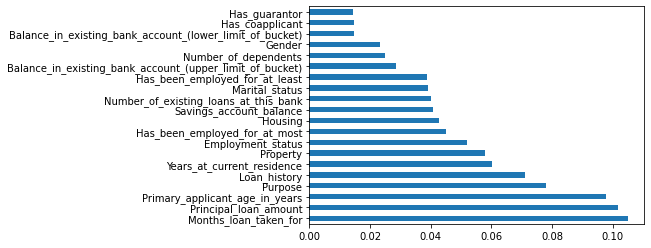

In [234]:
#Using ExtraTreeClassifier for feature selection
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [235]:
# Check feature importance
tree_importances = model.feature_importances_
tree_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': tree_importances
}).sort_values('importance', ascending=False)

In [236]:
#checking feature importance dataframe
tree_importance_df.head(2)

,feature,importance
13,Months_loan_taken_for,0.105166
15,Principal_loan_amount,0.101806


In [237]:
#storing top 10 features
top_ten_features=tree_importance_df.head(15)

In [238]:
top_ten_features

,feature,importance
13,Months_loan_taken_for,0.105166
15,Principal_loan_amount,0.101806
0,Primary_applicant_age_in_years,0.097808
14,Purpose,0.077980
20,Loan_history,0.071272
5,Years_at_current_residence,0.060276
16,Property,0.058103
6,Employment_status,0.052043
8,Has_been_employed_for_at_most,0.045209
4,Housing,0.042610


In [239]:
#creating dataframe only with top 10 features
df_final= df[['Months_loan_taken_for','Principal_loan_amount','Primary_applicant_age_in_years','Purpose',
              'Loan_history','Years_at_current_residence','Property','Employment_status','Has_been_employed_for_at_most','high_risk_applicant']]

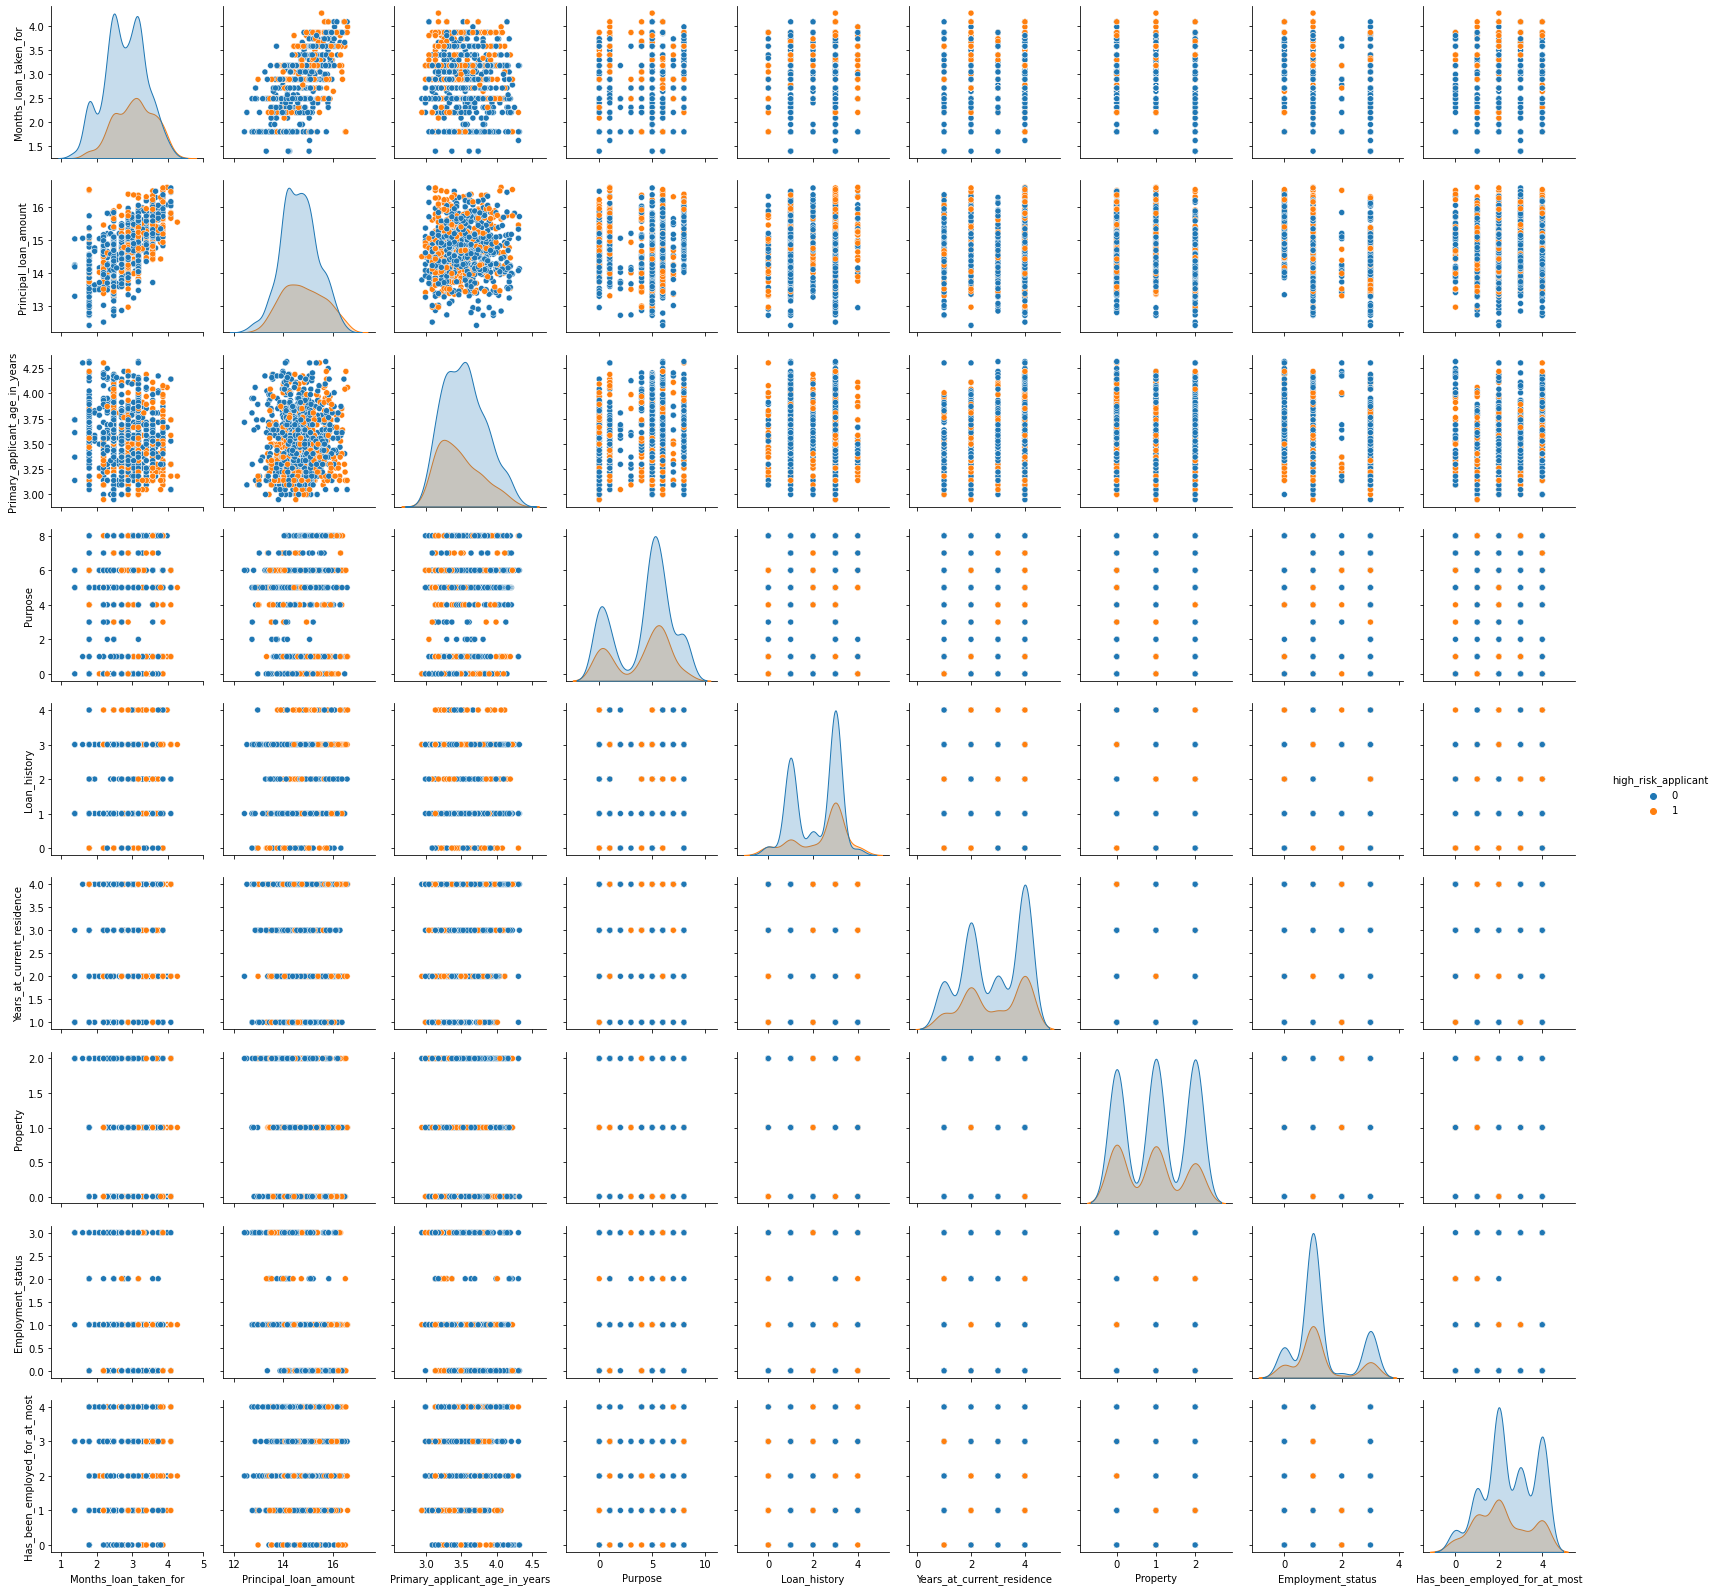

In [240]:
#visualising pairplot for all observations
sns.pairplot(data=df_final,hue='high_risk_applicant')

In [241]:
#separating dataset into X and y
y= df_final.high_risk_applicant
X = df_final.drop(['high_risk_applicant'] , axis = 1)

In [242]:
X.columns

Index(['Months_loan_taken_for', 'Principal_loan_amount',
       'Primary_applicant_age_in_years', 'Purpose', 'Loan_history',
       'Years_at_current_residence', 'Property', 'Employment_status',
       'Has_been_employed_for_at_most'],
      dtype='object')

MinMax Scalar

In [243]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
model=scaler.fit(df_final)
scaled_data=model.transform(df_final)


In [244]:
scaled_data

array([[0.1402813 , 0.37118649, 0.91785036, ..., 0.33333333, 1.        ,
        0.        ],
       [0.8597187 , 0.76282028, 0.1067722 , ..., 0.33333333, 0.5       ,
        1.        ],
       [0.38009377, 0.51169679, 0.68998355, ..., 1.        , 0.75      ,
        0.        ],
       ...,
       [0.38009377, 0.28111065, 0.50482329, ..., 0.33333333, 1.        ,
        0.        ],
       [0.8373899 , 0.48100172, 0.13914669, ..., 0.33333333, 0.5       ,
        1.        ],
       [0.8373899 , 0.69959375, 0.25592521, ..., 0.33333333, 0.        ,
        0.        ]])

In [245]:
df_final.columns

Index(['Months_loan_taken_for', 'Principal_loan_amount',
       'Primary_applicant_age_in_years', 'Purpose', 'Loan_history',
       'Years_at_current_residence', 'Property', 'Employment_status',
       'Has_been_employed_for_at_most', 'high_risk_applicant'],
      dtype='object')

In [246]:
df1 = pd.DataFrame(scaled_data, columns = ['Months_loan_taken_for', 'Principal_loan_amount',
       'Primary_applicant_age_in_years', 'Purpose', 'Loan_history',
       'Years_at_current_residence', 'Property', 'Employment_status',
       'Has_been_employed_for_at_most', 'high_risk_applicant'])

In [247]:
df1

,Months_loan_taken_for,Principal_loan_amount,Primary_applicant_age_in_years,Purpose,Loan_history,Years_at_current_residence,Property,Employment_status,Has_been_employed_for_at_most,high_risk_applicant
0,0.140281,0.371186,0.917850,0.625,0.25,1.000000,1.0,0.333333,1.00,0.0
1,0.859719,0.762820,0.106772,0.625,0.75,0.333333,1.0,0.333333,0.50,1.0
2,0.380094,0.511697,0.689984,0.500,0.25,0.666667,1.0,1.000000,0.75,0.0
3,0.813520,0.830448,0.627963,0.000,0.75,1.000000,0.0,0.333333,0.75,0.0
4,0.619906,0.714579,0.747135,0.750,0.50,1.000000,0.0,0.333333,0.50,1.0
...,...,...,...,...,...,...,...,...,...,...
983,0.380094,0.466347,0.356541,0.000,0.75,1.000000,1.0,1.000000,0.75,0.0
984,0.697109,0.658458,0.542181,1.000,0.75,1.000000,0.0,0.000000,0.50,0.0
985,0.380094,0.281111,0.504823,0.625,0.75,1.000000,0.5,0.333333,1.00,0.0
986,0.837390,0.481002,0.139147,0.625,0.75,1.000000,0.0,0.333333,0.50,1.0


###**Task 1.**

1. Do the Exploratory Data Analysis & share the insights.

Answer:

a). Applicants of age group 24-55 with marital status of single were likely to be    flagged as high risk.

b). The people belong to age group 55- 70, they used to take large amount for loan.

c). On the basis of employment Status it be concluded that skilled employees are less risky than any other category.

d). Customer who belong to the category existing loan paid back are less risky, they are expected to pay back loan to the company. Their history is also good as well.

e). The customer who has high loan amount and having own property and low saving account with high balance account are expected to back (low risky). 

Question 2: How would you segment customers based on their risk (of default).

Answer: a).On the basis of categoical feature we segment our customers.

b).Applicants of young age with marital status of single were likely to be flagged as high risk.

c).Applicants living in same residence for many years and had cleared all their previous loan amount very flagged as creditable. Applicants who paid previous loan dues in time were creditable.

d).Applicants who were highly skilled and had their own property were creditable.

e).Applicants taking high amount of loans and not paying on time were not creditable.

f).Young people with high skills/officials are more credi
skills/officials are more creditworthy as they are more likely to pay it on time.


Question 4. Tell us what your observations were on the data itself (completeness, skews).

Answer:
The data in datasets were right skewed and hence I applied log-transformation tto make normal distributtion.